Epoch 1/100


C:\Users\idrak\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\idrak\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\idrak\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7422 - loss: 0.6190 - val_accuracy: 0.7769 - val_loss: 0.4803
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7668 - loss: 0.4583 - val_accuracy: 0.8442 - val_loss: 0.3749
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8744 - loss: 0.3509 - val_accuracy: 0.9490 - val_loss: 0.2741
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9498 - loss: 0.2532 - val_accuracy: 0.9740 - val_loss: 0.2027
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9713 - loss: 0.1847 - val_accuracy: 0.9740 - val_loss: 0.1546
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9715 - loss: 0.1447 - val_accuracy: 0.9750 - val_loss: 0.1262
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9784 - loss: 0.1178 - val_accuracy: 0.9827 - val_loss: 0.1072
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9767 - loss: 0.1016 - val_accuracy: 0.9846 - val_loss: 0.0

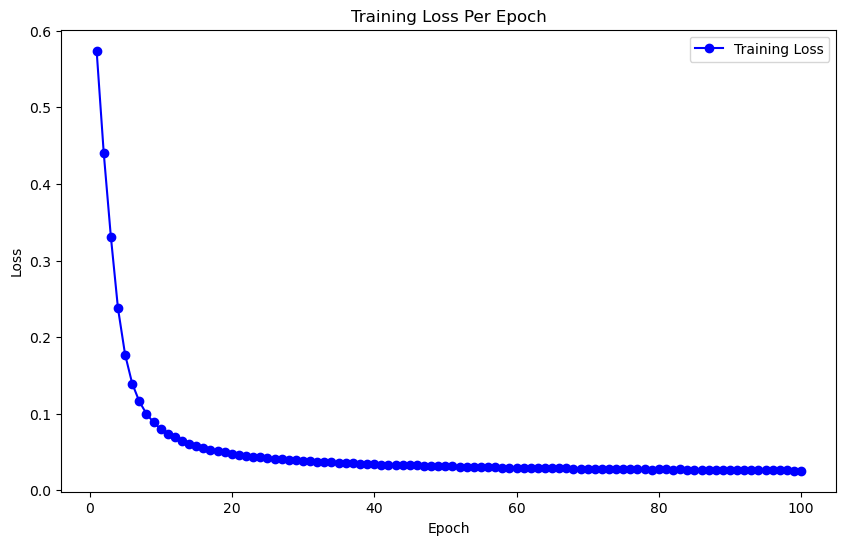

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Predicted class: White, Actual class: ['White']
Predicted class: Red, Actual class: ['Red']
Predicted class: White, Actual class: ['White']
Predicted class: White, Actual class: ['White']
Predicted class: Red, Actual class: ['White']
Predicted class: Red, Actual class: ['Red']
Predicted class: Red, Actual class: ['White']
Predicted class: White, Actual class: ['White']
Predicted class: Red, Actual class: ['Red']
Predicted class: White, Actual class: ['White']
Predicted class: Red, Actual class: ['White']
Predicted class: Red, Actual class: ['White']
Predicted class: Red, Actual class: ['White']
Predicted class: Red, Actual class: ['Red']
Predicted class: Red, Actual class: ['Red']
Predicted class: Red, Actual class: ['White']
Predicted class: Red, Actual class: ['Red']
Predicted class: Red, Actual class: ['White']
Predicted class: White, Actual class: ['White']
Predicted class: White, Actual class: ['White']
Predicted class: Red, Actual class: ['

In [9]:
#dataanalysisandwrangling 
import pandas as pd
import numpy as np
import seaborn as sns
#visualization importseabornassns
import matplotlib.pyplot as plt
%matplotlib inline
#scalingandtraintestsplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

#creatingamodel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

file_path = 'R_W_Wine_quality.csv'
data = pd.read_csv(file_path)
data

#df=data1[data1['type']=='Red']
#df

#data=df
#data

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
y1_labels = ['quality']
y2_labels = ['type']

X = data[features]
y1 = data[y1_labels]
y2 = data[y2_labels]

X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

X_train_scaled = MinMaxScaler().fit_transform(X_train[features])
X_test_scaled = MinMaxScaler().fit_transform(X_test[features])


label_encoder = LabelEncoder()


y2_train_encoded = label_encoder.fit_transform(y2_train)
y2_test_encoded = label_encoder.fit_transform(y2_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(11,)),
    #Dense(32, activation='relu'),
    Dense(2, activation='softmax')  
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy
              metrics=['accuracy'])


history = model.fit(X_train_scaled, y2_train_encoded, validation_split=0.2, epochs=100, batch_size=100, verbose=1)

training_loss=history.history['loss']
epochs = range(1, len(training_loss) + 1)

#plotting the training loss
plt.figure(figsize=(10,6))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.title('Training Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

predictions = model.predict(X_test_scaled)

predicted_classes = predictions.argmax(axis=1)

predicted_labels = label_encoder.inverse_transform(predicted_classes)



for predicted_label, actual_label1 in zip(predicted_labels, y2_test_encoded):
    actual_label_name1 = label_encoder.inverse_transform([actual_label1])
    
    print(f"Predicted class: {predicted_label}, Actual class: {actual_label_name1}")

correct_predictions = (predicted_labels == label_encoder.inverse_transform(y2_test_encoded)).sum()
accuracy = correct_predictions / len(y2_test)
print(f"Accuracy:{accuracy:.4f}")
